# Exercise 5
## Time Series Analysis & Recurrent Neural Networks, SoSe 2021
### Author: Elias Olofsson
    Version information:
        2021-05-26: v.1.0. First public release. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.rc('image', cmap='gray')
from pprint import pprint

from sklearn.linear_model import LinearRegression

# Notebook graphics settings: 
%config InlineBackend.figure_format = 'svg'     # inline vector graphics
#%config InlineBackend.figure_format = 'retina' # medium resolution png:s
#plt.rcParams['figure.dpi'] = 120               # custom dpi setting png

## Task 1: Kullback-Leibler divergence of two normal distributions

The Kullback-Leibler divergence of two continuous distributions $\mathcal{P}$ and $\mathcal{Q}$ is
    \begin{equation}
    K L(P \| Q)=\int_{-\infty}^{\infty} p(x) \log \left(\frac{p(x)}{q(x)}\right) d x.
    \end{equation}
Compute it analytically for the case where $P$ and $Q$ are two normal distributions $\mathcal{P}=\mathcal{N}\left(\boldsymbol{\mu}_{1}, \sigma_{1}\right)$ and $\mathcal{Q}=\mathcal{N}\left(\boldsymbol{\mu}_{2}, \sigma_{2}\right)$.
    
**Solution**:
\begin{align}
    K L(P \| Q)= \int_{-\infty}^{\infty} p(x) \log p(x) d x - \int_{-\infty}^{\infty} p(x) \log q(x) d x.
    \end{align}
    Using the probability density function from the univariate normal distribution
    \begin{equation}
        p(x)=\frac{1}{\sigma_1 \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu_1}{\sigma_1}\right)^{2}},
    \end{equation}
    we can evaluate the first integral to
    \begin{align}
        \int_{-\infty}^{\infty} p(x) \log p(x) d x = -\left(\frac{1}{2} + \log(\sigma_1 \sqrt{2\pi})\right), 
    \end{align}
    where we have used the fact that the probability density function is normalized over the entire number line, and the definition of the variance, as per $\operatorname{var}(x) = \sigma_1^2 = \left\langle x^{2}\right\rangle - \left\langle x\right\rangle^{2}$. To integrate the second integral, we similarly let $q(x)$ be defined by another univariate normal distribution as per
    \begin{equation}
        q(x)=\frac{1}{\sigma_2 \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu_2}{\sigma_2}\right)^{2}},
    \end{equation}
    which then means that
    \begin{equation}
        \log q(x) = \log\left(\frac{1}{\sigma_2 \sqrt{2 \pi}}\right) - \frac{1}{2 \sigma_2^2}\left(x-\mu_2\right)^{2}.
    \end{equation}
    To further match the integrand, we multiply this expression with $p(x)$ as per
    \begin{equation}
        p(x)\log q(x) = \log\left(\frac{1}{\sigma_2 \sqrt{2 \pi}}\right)p(x) - \frac{1}{2 \sigma_2^2}\left(x-\mu_2\right)^{2}p(x), 
    \end{equation}
    which then allows us to integrate over the entire number line    
    \begin{align}
        -\int_{-\infty}^{\infty} p(x) \log q(x) d x &= -\log\left(\frac{1}{\sigma_2 \sqrt{2 \pi}}\right) \int_{-\infty}^{\infty} p(x) d x + \frac{1}{2 \sigma_2^2}\int_{-\infty}^{\infty} \left(x-\mu_2\right)^{2}p(x)d x\\
        &= \log\left(\sigma_2 \sqrt{2 \pi}\right) + \frac{1}{2 \sigma_2^2}\int_{-\infty}^{\infty} \left(x^2 -2\mu_2x + \mu_2^2\right)p(x)d x\\
        &= \log\left(\sigma_2 \sqrt{2 \pi}\right) + \frac{1}{2 \sigma_2^2} \left[ \int_{-\infty}^{\infty} x^2p(x)d x - 2\mu_2 \int_{-\infty}^{\infty} x p(x)d x  + \mu_2^2 \int_{-\infty}^{\infty}  p(x)d x  \right]\\
        &= \log\left(\sigma_2 \sqrt{2 \pi}\right) + \frac{1}{2 \sigma_2^2} \left[ \left\langle x^{2}\right\rangle_p - 2\mu_2 \left\langle x\right\rangle_p + \mu_2^2\right]\\
        &= \log\left(\sigma_2 \sqrt{2 \pi}\right) + \frac{1}{2 \sigma_2^2} \left[ \sigma_1^2 + \mu_1^2 - 2\mu_1\mu_2  + \mu_2^2\right]\\
        &= \log\left(\sigma_2 \sqrt{2 \pi}\right) + \frac{1}{2 \sigma_2^2} \left[ \sigma_1^2 + \left(\mu_1 - \mu_2\right)^2\right],
    \end{align}
    where we used the fact that $p(x)$ is normalized over the entire number line, and the definition of variance, i.e.
    \begin{equation}
        \operatorname{var}(x)=\left\langle x^{2}\right\rangle-\langle x\rangle^{2} \quad \Rightarrow \quad  \left\langle x^{2}\right\rangle=\sigma_{1}^{2}+\mu_{1}^{2}.
    \end{equation}
    Collecting the result of the integrals, we arrive at
    \begin{align}
        K L(P \| Q) &= -\left(\frac{1}{2} + \log(\sigma_1 \sqrt{2\pi})\right) + \log\left(\sigma_2 \sqrt{2 \pi}\right) + \frac{1}{2 \sigma_2^2} \left[ \sigma_1^2 + \left(\mu_1 - \mu_2\right)^2\right]\\
        &= \log\left(\frac{\sigma_2}{\sigma_1}\right) + \frac{\sigma_1^2 + \left(\mu_1 - \mu_2\right)^2}{2 \sigma_2^2} - \frac{1}{2},
    \end{align}
    which is the full Kullback-Leibler divergence for two normal distributions. 
    
Now, by plugging in $\mu_1 = \mu_2$ and $\sigma_1 = \sigma_2$ one can easily see that the KL divergence evaluates to 0.

Furthermore, for the specific values $\mu_1 = 0, \mu_2 = 1, \sigma_1 = 3$ and $\sigma_2 = 1$, we can evaluate the KL divergence as per: 

In [2]:
mu1 = 0
mu2 = 1
sigma1 = 3
sigma2 = 1

KL = np.log(sigma2/sigma1) + 0.5*(sigma1**2 + (mu1 - mu2)**2)/sigma2**2 -1/2
print(KL)

3.40138771133189


## Task 2: Kalman filter smoother

In [3]:
# Import and extract the matrices and vectors.
import scipy.io
mat = scipy.io.loadmat('ex5.mat')

print(mat.keys())

A     = mat['A']
B     = mat['B']
C     = mat['C']
gamma = mat['Gamma']
L0    = mat['L0']
sigma = mat['Sigma']
mu0   = mat['mu0']
u     = mat['u']
x     = mat['x']
z     = mat['z']

dict_keys(['__header__', '__version__', '__globals__', 'A', 'B', 'C', 'Gamma', 'L0', 'Sigma', 'mu0', 'u', 'x', 'z'])


(1, 100)


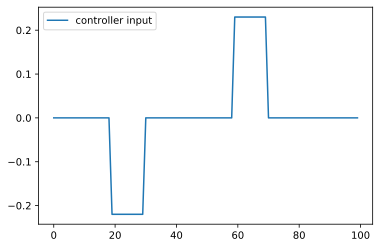

In [4]:
print(u.shape)
plt.plot(u.T, label='controller input')
plt.legend()
plt.show()

(2, 100) (2, 100)


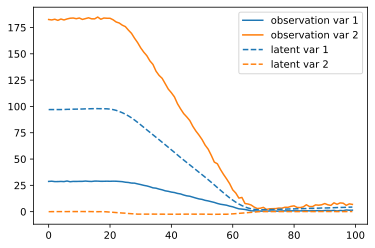

In [5]:
print(x.shape, z.shape)
plt.plot(x[0], label='observation var 1')
plt.plot(x[1], label='observation var 2')
plt.plot(z[0], '--', label='latent var 1', c='tab:blue')
plt.plot(z[1], '--', label='latent var 2', c='tab:orange')
plt.legend()
plt.show()

# Transpose for easier python indexing
x = x.T
z = z.T
u = u.T

In [6]:
# Kalman filter recursions
T, p = x.shape

L = np.zeros((T, p, p))
V = np.zeros((T, p, p))
mu = np.zeros((T, p))

L[0] = L0
mu[0] = mu0.flatten()

for t in range(1, T):
    K = L[t-1] @ B.T @ np.linalg.inv(B @ L[t-1] @ B.T + gamma)
    V[t] = (np.eye(2) - K @ B) @ L[t-1]
    L[t] = A @ V[t] @ A.T + sigma
    mu[t] = A @ mu[t-1] + C @ u[t] + K @ (x[t] - B @ (A @ mu[t-1] + C @ u[t]))

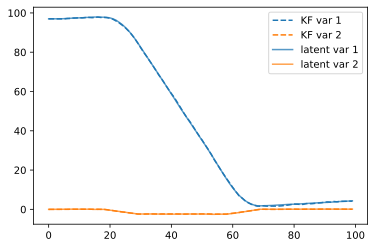

In [7]:
# Comparing the obtained predicted latent states against the true latent states.
plt.plot(mu[:,0], '--', label='KF var 1')
plt.plot(mu[:,1], '--', label='KF var 2')
plt.plot(z[:, 0], label='latent var 1', c='tab:blue', alpha=0.75)
plt.plot(z[:, 1], label='latent var 2', c='tab:orange', alpha=0.75)
plt.legend()
plt.show()

The drone seems to have been given a negative user input which made it start dropping from a high altitude and quickly descent towards the ground. Right before the drone would hit the ground, the user gave a large positive input and halted the downwards velocity, and brought the drone close to a hover at low altitude.

In [8]:
A

array([[1, 1],
       [0, 1]], dtype=uint8)

The transition matrix A shows that variable 1 is dependent on both variable 1 and 2, while variable 2 is only dependent on itself. Given the explaination that variable 1 is the position (e.g. altitude) and variable 2 is the velocity in some orientation, this transition matrix makes sense physically. The altitude is dependent on itself and the velocity, while the velocity is only dependent on itself, not on altitude. Thus the transition matrix takes the form as above.

In [9]:
C

array([[0.5],
       [1. ]])

The matrix C describing the influence of the control variables $\vec{u}_t$ tells us that given a positive user input, the drone recieves an additional change in its altitude by 0.5 times the input, and an additional change in velocity by 1 times the input. Given a negative input, the altitude and velocity changes switch direction.

In [10]:
# Kalman-smoother.
mu_tilde = np.zeros_like(mu)
V_tilde  = np.zeros_like(V) 

mu_tilde[-1] = mu[-1]
V_tilde[-1] = V[-1]

for t in reversed(range(T-1)):
    L_inv = np.linalg.inv(L[t])
    V_tilde[t] = V[t] + V[t] @ A.T @ L_inv @ (V_tilde[t+1] - L[t]) @ L_inv @ A @ V[t].T 
    mu_tilde[t] = mu[t] + V[t] @ A.T @ L_inv @ (mu_tilde[t+1] - A @ mu[t])

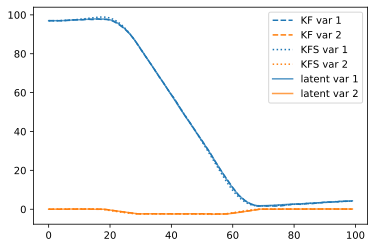

In [11]:
# Comparing the obtained predicted latent states against the true latent states.
plt.plot(mu[:,0], '--', label='KF var 1')
plt.plot(mu[:,1], '--', label='KF var 2')
plt.plot(mu_tilde[:,0], ':', c='tab:blue', label='KFS var 1')
plt.plot(mu_tilde[:,1], ':', c='tab:orange', label='KFS var 2')
plt.plot(z[:, 0], label='latent var 1', c='tab:blue', alpha=0.75)
plt.plot(z[:, 1], label='latent var 2', c='tab:orange', alpha=0.75)
plt.legend()
plt.show()

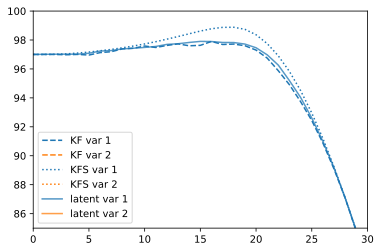

In [12]:
# Zoom-in on the bend in the upper corner
plt.plot(mu[:,0], '--', label='KF var 1')
plt.plot(mu[:,1], '--', label='KF var 2')
plt.plot(mu_tilde[:,0], ':', c='tab:blue', label='KFS var 1')
plt.plot(mu_tilde[:,1], ':', c='tab:orange', label='KFS var 2')
plt.plot(z[:, 0], label='latent var 1', c='tab:blue', alpha=0.75)
plt.plot(z[:, 1], label='latent var 2', c='tab:orange', alpha=0.75)
plt.legend()
plt.xlim([0, 30])
plt.ylim([85, 100])
plt.show()

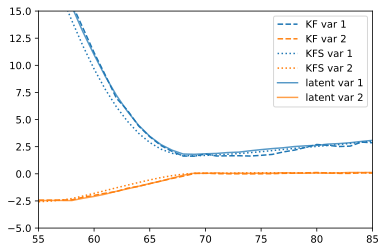

In [13]:
# Zoom-in on the bend in the lower corner
plt.plot(mu[:,0], '--', label='KF var 1')
plt.plot(mu[:,1], '--', label='KF var 2')
plt.plot(mu_tilde[:,0], ':', c='tab:blue', label='KFS var 1')
plt.plot(mu_tilde[:,1], ':', c='tab:orange', label='KFS var 2')
plt.plot(z[:, 0], label='latent var 1', c='tab:blue', alpha=0.75)
plt.plot(z[:, 1], label='latent var 2', c='tab:orange', alpha=0.75)
plt.legend()
plt.xlim([55, 85])
plt.ylim([-5, 15])
plt.show()

As one can see, the filter-smoother makes the estimates way smoother and less noisy than just using the filter.

In [14]:
mean_res_KF = np.mean((z-mu)**2)
std_res_KF  = np.std((z-mu)**2)

mean_res_KFS = np.mean((z-mu_tilde)**2)
std_res_KFS  = np.std((z-mu_tilde)**2)

print(f'Kalman-filter,          Mean squared error: {mean_res_KF:7.5} ± {std_res_KF:7.5}')
print(f'Kalman-filter-smoother, Mean squared error: {mean_res_KFS:7.5} ± {std_res_KFS:7.5}')

Kalman-filter,          Mean squared error: 0.021759 ± 0.046689
Kalman-filter-smoother, Mean squared error: 0.13946 ± 0.34543


Thus, the trade-off with the Kalman-filter-smoother is that the error relative to the underlying latent state becomes larger than the Kalman-filter. However, the smoothed trajectory may still be more beneficial, depeneding on the application. 